# Storytelling Data Visualization on Exchange Rates

In this project, I am going to combine the skills learned about explanatory data visualization into one exercise:
- How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
- How to create visual patterns using Gestalt principles.
- How to guide the audience's attention with pre-attentive attributes.
- How to use Matplotlib built-int styles.

The dataset that I'll be using describes Euros daily exchange rates between 1999 and 2021. The Euro (symbolized with €) isthe official currency in most of the countries of the European Union.

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)- the data source is the European Central Bank. Note that the datset gets regular updates - this was pulled on January 2021.

**Let's start by reading in the dataset.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

After running the `info()` of `exchange_rates`, the data set contains 41 columns, 5699 entries (or rows), 39 columns entries are classified as `object`. Most of the columns' non-null entries are close to total entries of 5699. However, `Greek drachma`, `Slovenian tolar`, `Cypriot pound`, `Maltese lira`, `Estonian kroon`, `Iceland krona` and `Slovak koruna` are mising subtantial data points (null data). 

In [3]:
exchange_rates.rename(columns = {'[US dollar ]': 'US_dollar', 'Period\\Unit:':'Time'}
                      , inplace = True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace = True)
exchange_rates.reset_index(drop = True, inplace = True)

In [4]:
exchange_rates

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


In [5]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]

In [6]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

There is a special character `-` appears in the `US_dollar` column, this indirectly indicates the `null` values. I am going to remove the rows containing the `-`.

In [7]:
euro_to_dollar = euro_to_dollar[ euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [8]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


### Rolling Mean
Let's graph a line plot between `Time` and `US_dollar`.

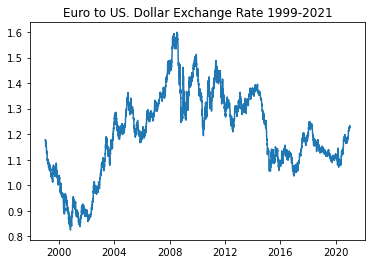

In [9]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.title('Euro to US. Dollar Exchange Rate 1999-2021')
plt.show()

We can see many small wiggles, meaning there are daily variation in the exchange rate. If I want to show the long term trends, I will need to use rolling mean (also known as moving average), to help smooth out the line, taking attention away from little price wiggling.

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar[ ~euro_to_dollar['rolling_mean'].isnull()]

,Time,US_dollar,rolling_mean
29,1999-02-12,1.1244,1.150667
30,1999-02-15,1.1238,1.148830
31,1999-02-16,1.1176,1.146783
32,1999-02-17,1.1253,1.145150
33,1999-02-18,1.1232,1.143817
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


Let's graph `rolling_mean` column with `Time` to see what we get.

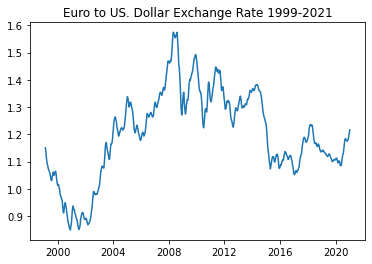

In [11]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.title('Euro to US. Dollar Exchange Rate 1999-2021')
plt.show()

### Coming up with an Idea
The graph illustrates the monthly variation between the Euro and US. dollar, there are many stories and factors, arguably, which can come in and have relative strong impacts on the exchange rates. Although it is not the perfect storytelling, I am going to compare the rates with the US economy (1999 - 2020) to partially understand why and how the they fluctuate.

##### Three major economic events happened from 1999-2020:
- `2000 - 2001`: [Many factos contributing to a decline in economic activity](https://en.wikipedia.org/wiki/Early_2000s_recession). The EU introduced a new currency, the euro, which was met with great anticipation, had its value immediately plummet. Dot-come bubble bursted The US economy took downfall from March 2001 until November 2001, but the impacts then lingered on until 2003.   

- `December 2007 - June 2009`: there happened a devastating economic recession in the US economy, which pressured on the FED to [lower interest rates](https://fred.stlouisfed.org/series/FEDFUNDS) considerably, to stimulate the economy, which in turn weakened the US dollar. 

- `March 2020`: [COVID 19 hits the US and the European nations](https://en.wikipedia.org/wiki/COVID-19_pandemic) hard, causing cities and states go to total lockdown and discrupting the global economy and a shock in supply chain accorss the nation. The US Federal Reserve once more, lowering interest rates to ease the pain, leading to the US dollar lose its strength relative to Euro currency. However, because it was a global pandemic, European nations also used strict preventative public measure to mitigate the spread of COVID, and the European central bank lowered the rates to combat the pandemic, ultimately, leading to weakening of the Euro.

In [38]:
first = euro_to_dollar[ (euro_to_dollar['Time'] >= '2000-01-01') & (euro_to_dollar['Time'] <= '2001-12-31')]['Time']
first

260   2000-01-03
261   2000-01-04
262   2000-01-05
263   2000-01-06
264   2000-01-07
         ...    
773   2001-12-20
774   2001-12-21
775   2001-12-24
778   2001-12-27
779   2001-12-28
Name: Time, Length: 509, dtype: datetime64[ns]

In [29]:
second = euro_to_dollar[ (euro_to_dollar['Time'] >= '2007-12-01') & (euro_to_dollar['Time'] <= '2009-06-30')]['Time']
second

2325   2007-12-03
2326   2007-12-04
2327   2007-12-05
2328   2007-12-06
2329   2007-12-07
          ...    
2732   2009-06-24
2733   2009-06-25
2734   2009-06-26
2735   2009-06-29
2736   2009-06-30
Name: Time, Length: 400, dtype: datetime64[ns]

In [36]:
third = euro_to_dollar[ (euro_to_dollar['Time'] >= '2020-02-01') & (euro_to_dollar['Time'] <= '2020-12-31')]['Time']
third

5459   2020-02-03
5460   2020-02-04
5461   2020-02-05
5462   2020-02-06
5463   2020-02-07
          ...    
5689   2020-12-24
5690   2020-12-28
5691   2020-12-29
5692   2020-12-30
5693   2020-12-31
Name: Time, Length: 235, dtype: datetime64[ns]

### Coding with Graph

Now that the idea of a data visualization story is formed, I'll start coding.

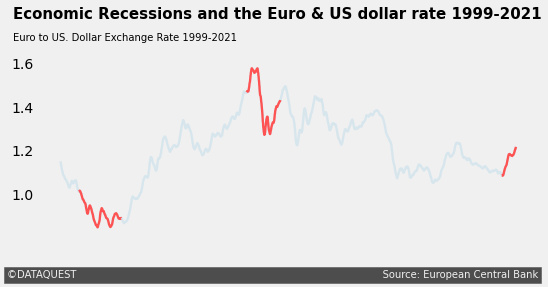

In [40]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'], alpha = 0.1, linewidth = 2.4)

# Highlight specific periods:
ax.plot(euro_to_dollar['Time'][first.index[0]:first.index[-1]+1],euro_to_dollar['rolling_mean'][first.index[0]:first.index[-1]+1]
        , color = '#ff5252'
        , linewidth = 2.3)
ax.plot(euro_to_dollar['Time'][second.index[0]:second.index[-1]+1],euro_to_dollar['rolling_mean'][second.index[0]:second.index[-1]+1]
        ,color = '#ff5252'
        ,linewidth = 2.3)
ax.plot(euro_to_dollar['Time'][third.index[0]:third.index[-1]+1],euro_to_dollar['rolling_mean'][third.index[0]:third.index[-1]+1]
        ,color = '#ff5252'
        ,linewidth = 2.3)

ax.grid(b = False)
ax.set_xticklabels([])

#Add title, subtitle, and signature:
ax.text(x = 9800, y = 1.8, s = 'Economic Recessions and the Euro & US dollar rate 1999-2021', weight = 'bold', size = 15)
ax.text(x= 9800, y = 1.7, s= 'Euro to US. Dollar Exchange Rate 1999-2021', size = 10)
ax.text(x = 9700, y = 0.62, s = '©DATAQUEST' + ' '*98 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)
plt.show()